In [13]:
#1. import packages
#2. set hyper-params (N_in, N_out, N_h)
#3. implementation of ANN models
#4. load & preprocess data
#5. training
#6. evaluating the results

In [1]:
from tensorflow.keras import layers, models
import numpy as np

## 3.
# Classification
def ANN_seq_func(Nin, Nh, Nout):
    # network design
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    model.add(layers.Dense(Nout, activation='softmax'))

    # setting optimizer and loss function
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def ANN_seq_func_hl(Nin, Nh, Nhidden, Nout):
    # network design
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    model.add(layers.Dense(Nhidden, activation='relu'))
    model.add(layers.Dense(Nout, activation='softmax'))

    # setting optimizer and loss function
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [2]:
## 4. Load and preprocess data
from tensorflow.keras.datasets import mnist

# data load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# data reshape and normalization
L, W, H = train_images.shape
train_images = train_images.reshape((60000, W*H)) # (-1, W*H)
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, W*H)) # (-1, W*H)
test_images = test_images.astype('float32')/255

# binary target (one hot encoding)

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


network = ANN_seq_func(W*H, 512, 10)
# network = ANN_seq_func_hl(W*H, 512, 128, 10) # over fitting case example

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-04-09 04:59:08.187021: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-09 04:59:08.187326: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
# ## 5&6. Training and Evaluation

# # fitting
# network.fit(train_images, train_labels, epochs=5, batch_size=128)

# evaluate on test set
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_acc:", test_acc)
print("test_loss:", test_loss)

2023-04-09 04:59:11.288530: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-09 04:59:11.385693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 8ms/step - loss: 2.4548 - accuracy: 0.0818
test_acc: 0.08179999887943268
test_loss: 2.4548206329345703


In [4]:
## 6-1. Evaluation with visualization

# fitting with validation dataset
h = network.fit(train_images, train_labels, epochs=20, batch_size=100, validation_split=0.2)

# evaluate on test set
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_acc:", test_acc)
print("test_loss:", test_loss)

Epoch 1/20


2023-04-09 04:59:17.431623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


480/480 [==============================] - 6s 11ms/step - loss: 0.2776 - accuracy: 0.9194 - val_loss: 0.1419 - val_accuracy: 0.9585
Epoch 2/20
480/480 [==============================] - 5s 11ms/step - loss: 0.1120 - accuracy: 0.9668 - val_loss: 0.1003 - val_accuracy: 0.9713
Epoch 3/20
480/480 [==============================] - 5s 11ms/step - loss: 0.0732 - accuracy: 0.9784 - val_loss: 0.0878 - val_accuracy: 0.9751
Epoch 4/20
480/480 [==============================] - 5s 11ms/step - loss: 0.0527 - accuracy: 0.9842 - val_loss: 0.0882 - val_accuracy: 0.9743
Epoch 5/20
480/480 [==============================] - 6s 12ms/step - loss: 0.0387 - accuracy: 0.9884 - val_loss: 0.0805 - val_accuracy: 0.9763
Epoch 6/20
480/480 [==============================] - 5s 11ms/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.0800 - val_accuracy: 0.9776
Epoch 7/20
480/480 [==============================] - 5s 10ms/step - loss: 0.0221 - accuracy: 0.9935 - val_loss: 0.0810 - val_accuracy: 0.9788
Epoch 8/20

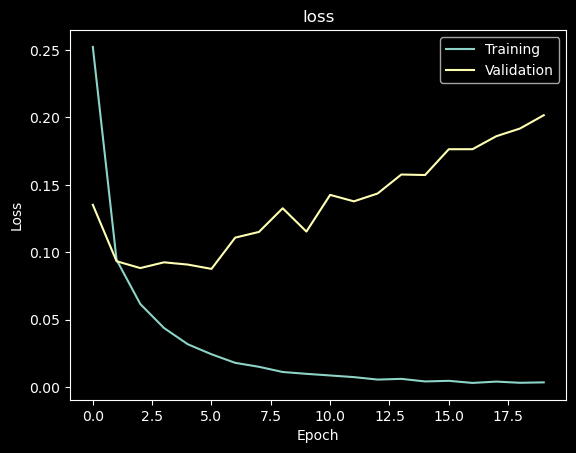

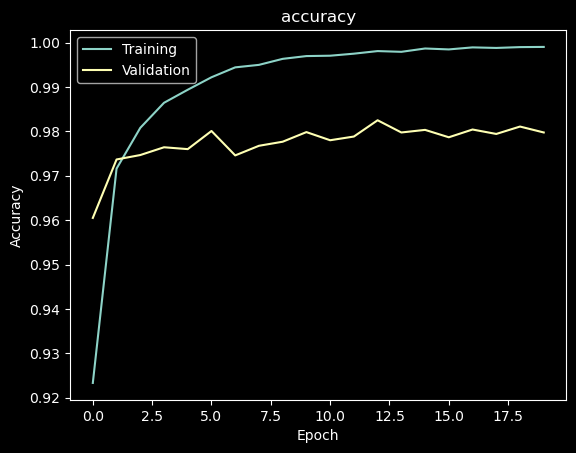

<Figure size 640x480 with 0 Axes>

In [18]:
# plot_loss & plot_acc definition
import matplotlib.pyplot as plt

def plot_acc(h, title='accuracy'):
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc=0)

def plot_loss(h, title='loss'):
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc=0)

# visualization
plot_loss(h)
plt.show()
# plt.savefig('chapter2-1.loss.png')

plt.clf()
plot_acc(h)
plt.show()
# plt.savefig('chapter2-1.accuracy.png')
plt.clf()
